In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('calendar.csv')
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,$125.00,$125.00,30.0,90.0
1,2595,2021-01-09,t,$175.00,$175.00,30.0,1125.0
2,2595,2021-01-10,t,$175.00,$175.00,30.0,1125.0
3,2595,2021-01-11,t,$175.00,$175.00,30.0,1125.0
4,2595,2021-01-12,t,$175.00,$175.00,30.0,1125.0


In [5]:
df.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                     object
adjusted_price            object
minimum_nights           float64
maximum_nights           float64
dtype: object

In [4]:
df['date']= pd.to_datetime(df['date'])

In [6]:
calendar_2021 = df.loc[df['date'] < "2022-1-1"]
calendar_2021

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,$125.00,$125.00,30.0,90.0
1,2595,2021-01-09,t,$175.00,$175.00,30.0,1125.0
2,2595,2021-01-10,t,$175.00,$175.00,30.0,1125.0
3,2595,2021-01-11,t,$175.00,$175.00,30.0,1125.0
4,2595,2021-01-12,t,$175.00,$175.00,30.0,1125.0
...,...,...,...,...,...,...,...
13554635,46867150,2021-12-27,f,$175.00,$175.00,3.0,1125.0
13554636,46867150,2021-12-28,f,$175.00,$175.00,3.0,1125.0
13554637,46867150,2021-12-29,f,$175.00,$175.00,3.0,1125.0
13554638,46867150,2021-12-30,f,$175.00,$175.00,3.0,1125.0


In [7]:
calendar_2021 = calendar_2021.loc[calendar_2021['available'] == "t"]
calendar_2021

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,$125.00,$125.00,30.0,90.0
1,2595,2021-01-09,t,$175.00,$175.00,30.0,1125.0
2,2595,2021-01-10,t,$175.00,$175.00,30.0,1125.0
3,2595,2021-01-11,t,$175.00,$175.00,30.0,1125.0
4,2595,2021-01-12,t,$175.00,$175.00,30.0,1125.0
...,...,...,...,...,...,...,...
13554460,46867150,2021-07-05,t,$175.00,$175.00,3.0,1125.0
13554461,46867150,2021-07-06,t,$175.00,$175.00,3.0,1125.0
13554462,46867150,2021-07-07,t,$175.00,$175.00,3.0,1125.0
13554463,46867150,2021-07-08,t,$175.00,$175.00,3.0,1125.0


In [10]:
calendar_2021['price'] = calendar_2021['price'].str.replace('$', '')
calendar_2021['price'] = calendar_2021['price'].str.replace(',', '')
calendar_2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,42729,2021-01-11,t,125.00,$125.00,30.0,90.0
1,2595,2021-01-09,t,175.00,$175.00,30.0,1125.0
2,2595,2021-01-10,t,175.00,$175.00,30.0,1125.0
3,2595,2021-01-11,t,175.00,$175.00,30.0,1125.0
4,2595,2021-01-12,t,175.00,$175.00,30.0,1125.0
...,...,...,...,...,...,...,...
13554460,46867150,2021-07-05,t,175.00,$175.00,3.0,1125.0
13554461,46867150,2021-07-06,t,175.00,$175.00,3.0,1125.0
13554462,46867150,2021-07-07,t,175.00,$175.00,3.0,1125.0
13554463,46867150,2021-07-08,t,175.00,$175.00,3.0,1125.0


In [11]:
calendar_2021['price'] = calendar_2021['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
calendar_model = calendar_2021.groupby(['date']).mean().reset_index()
calendar_model

,date,listing_id,price,minimum_nights,maximum_nights
0,2021-01-08,3.877157e+07,270.846154,41.307692,2.202556e+08
1,2021-01-09,2.763448e+07,194.466555,27.527592,1.975196e+07
2,2021-01-10,2.817463e+07,164.166401,23.124801,1.368633e+07
3,2021-01-11,2.842510e+07,159.294189,22.271414,1.017964e+07
4,2021-01-12,2.806715e+07,157.803842,21.962349,7.485672e+06
...,...,...,...,...,...
353,2021-12-27,2.668430e+07,181.956220,37.331051,4.902963e+06
354,2021-12-28,2.667962e+07,183.071290,37.308472,4.900064e+06
355,2021-12-29,2.667055e+07,183.354279,37.358001,4.906280e+06
356,2021-12-30,2.667112e+07,185.625613,37.345224,4.903792e+06


In [28]:
calendar_model=calendar_model[['date', 'price']]
calendar_model

,date,price
0,2021-01-08,270.846154
1,2021-01-09,194.466555
2,2021-01-10,164.166401
3,2021-01-11,159.294189
4,2021-01-12,157.803842
...,...,...
353,2021-12-27,181.956220
354,2021-12-28,183.071290
355,2021-12-29,183.354279
356,2021-12-30,185.625613


In [33]:
calendar_model = calendar_model.rename(columns={"date": "ds", "price": "y"})

In [34]:
model = Prophet()
model.fit(calendar_model)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
calendar_model.tail()

,ds,y
353,2021-12-27,181.956220
354,2021-12-28,183.071290
355,2021-12-29,183.354279
356,2021-12-30,185.625613
357,2021-12-31,188.902854


In [36]:
future_df = model.make_future_dataframe(periods=365)
future_df

,ds
0,2021-01-08
1,2021-01-09
2,2021-01-10
3,2021-01-11
4,2021-01-12
...,...
718,2022-12-27
719,2022-12-28
720,2022-12-29
721,2022-12-30


In [37]:
predictions = model.predict(future_df)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-08,171.787586,168.678099,182.979821,171.787586,171.787586,3.959739,3.959739,3.959739,3.959739,3.959739,3.959739,0.0,0.0,0.0,175.747325
1,2021-01-09,171.181040,166.444646,181.413060,171.181040,171.181040,2.749767,2.749767,2.749767,2.749767,2.749767,2.749767,0.0,0.0,0.0,173.930807
2,2021-01-10,170.574493,161.270403,175.858919,170.574493,170.574493,-1.619535,-1.619535,-1.619535,-1.619535,-1.619535,-1.619535,0.0,0.0,0.0,168.954958
3,2021-01-11,169.967946,160.709150,175.545955,169.967946,169.967946,-1.569240,-1.569240,-1.569240,-1.569240,-1.569240,-1.569240,0.0,0.0,0.0,168.398706
4,2021-01-12,169.361400,160.713246,175.186719,169.361400,169.361400,-1.252926,-1.252926,-1.252926,-1.252926,-1.252926,-1.252926,0.0,0.0,0.0,168.108474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2022-12-27,218.764104,145.475070,298.978557,144.139388,298.463999,-1.252926,-1.252926,-1.252926,-1.252926,-1.252926,-1.252926,0.0,0.0,0.0,217.511178
719,2022-12-28,218.864714,143.421244,298.545884,143.856264,298.909553,-1.146541,-1.146541,-1.146541,-1.146541,-1.146541,-1.146541,0.0,0.0,0.0,217.718173
720,2022-12-29,218.965324,141.783519,298.366445,143.606020,299.388958,-1.121265,-1.121265,-1.121265,-1.121265,-1.121265,-1.121265,0.0,0.0,0.0,217.844059
721,2022-12-30,219.065934,147.748015,306.088062,143.358873,299.875197,3.959739,3.959739,3.959739,3.959739,3.959739,3.959739,0.0,0.0,0.0,223.025673


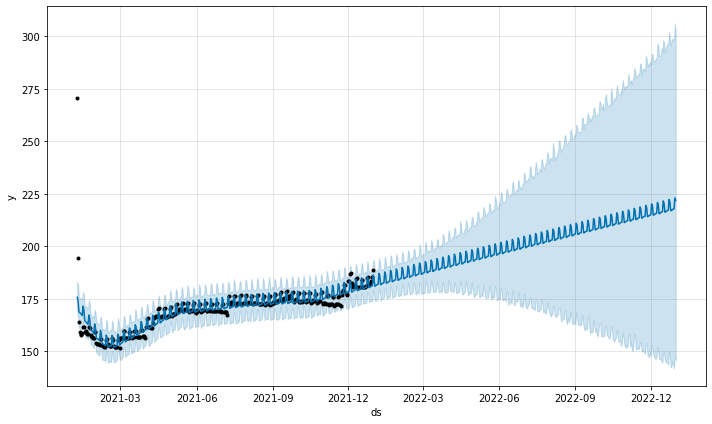

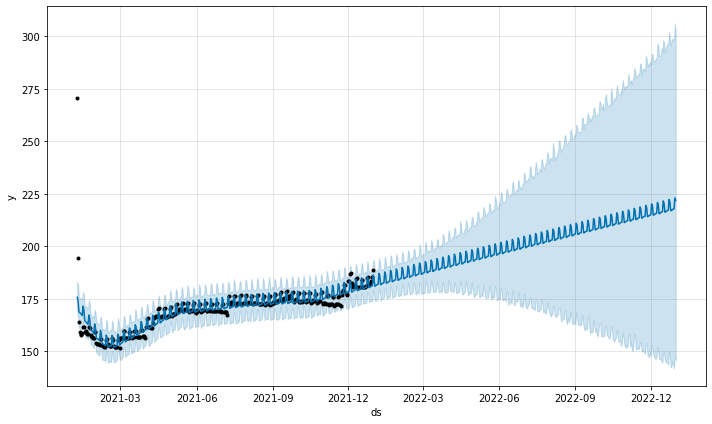

In [38]:
model.plot(predictions)

In [40]:
calendar_model.describe

<bound method NDFrame.describe of             ds           y
0   2021-01-08  270.846154
1   2021-01-09  194.466555
2   2021-01-10  164.166401
3   2021-01-11  159.294189
4   2021-01-12  157.803842
..         ...         ...
353 2021-12-27  181.956220
354 2021-12-28  183.071290
355 2021-12-29  183.354279
356 2021-12-30  185.625613
357 2021-12-31  188.902854

[358 rows x 2 columns]>

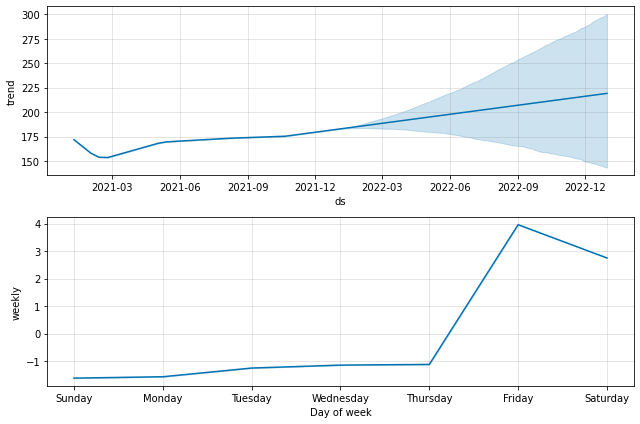

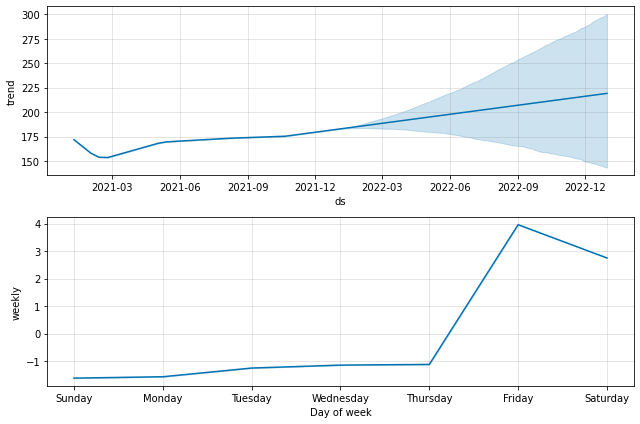

In [39]:
model.plot_components(predictions)